#import Liberary


In [1]:
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
import keras.layers as layers
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
#from keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras as keras
import h5py
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential

init_notebook_mode(connected=True)
%matplotlib inline

#main Func

In [2]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data


def load_image_as_gray( infilename ) :
    img = Image.open( infilename ).convert('L')
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data
def display_gray_image(img):
    plt.imshow(img.reshape(150,100)*255, cmap='gray', vmin=0, vmax=255)
    plt.show()

##3D Neural Network Model


In [3]:
def get_3d_model(width=150,height=100,depth=3):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input( (150, 100, 1))
    
   
    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=11, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model

def get_2d_conv(input_shape,num_classes):
    #input_shape = (150, 100, 1)
    model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(100, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(100, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(100, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
      )
    print(input_shape)
    model.summary()
    return model;
def saveModelWitht(newModel,address):

    newModel.save('/content/drive/MyDrive/Kasra/networks/kasraNetworkModel.h5')


    return 0

#import datasets and preproccessing


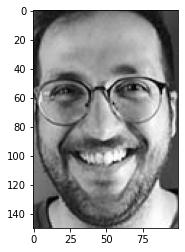

In [10]:
# for root, dirs, files in os.walk('/content/drive/MyDrive/Kasra/datasets/train'):
#     for name in files:
#         if name.endswith((".jpeg", ".jpg")):
#             print(name)

trainData =np.arange(5400000).reshape(120,150, 100, 3)
grayTrainData = np.arange(1800000).reshape(120,150, 100,1)

trainTarget = np.arange(120).reshape(120,1)
print(grayTrainData.shape)
print(trainTarget[4])
i=0

for root, dirs, files in os.walk('/content/drive/MyDrive/Kasra/datasets/train'):
    for name in files:
      
      # Open the image form working directory
      print(root.rsplit('/', 1)[-1]+'----->>>'+name)
      data = load_image(root+'/'+name)
      data1 = load_image_as_gray(root+'/'+name)
      trainData[i]=data
      grayTrainData[i] = data1.reshape(150,100,1)
      trainTarget[i]=root.rsplit('/', 1)[-1]
      
      i+=1


grayTrainData.shape
#############################pre Proccessing ################
trainTarget.shape


ytrain = keras.utils.all_utils.to_categorical(trainTarget, 12)    
ytrain[0]


grayTrainData = grayTrainData/255
data1 =data1/255
data1.shape
# dd = Image(age.fromarray((data1 ).astype(np.uint8))
# data1=data1 * 255
inde=119
display_gray_image(grayTrainData[inde])
print('real target:'+ str(ytrain[inde].argmax()))
print(trainTarget[inde])












####################test DATA #@#################



#testData  =np.arange(4950000).reshape(22,150, 100, 3)
grayTestData = np.arange(330000).reshape(22,150, 100,1)

testTarget = np.arange(22).reshape(22,1)
print(grayTrainData.shape)
print(trainTarget[4])
i=0

for root, dirs, files in os.walk('/content/drive/MyDrive/Kasra/datasets/test'):
    for name in files:
      
      # Open the image form working directory
      print(root.rsplit('/', 1)[-1]+'----->>>'+name)
      data = load_image(root+'/'+name)
      data1 = load_image_as_gray(root+'/'+name)
      #trainData[i]=data
      grayTestData[i] = data1.reshape(150,100,1)
      #trainTarget[i]=root.rsplit('/', 1)[-1]
      
      i+=1


grayTrainData.shape
#############################pre Proccessing ################
trainTarget.shape

grayTestData = grayTestData/255

display_gray_image( grayTestData[0])

# inde = 8
# classnumber =  newModel.predict(grayTestData[inde].reshape(1,150,100,1))
# display_gray_image(grayTestData[inde])

# print('network Detection : '+ str(classnumber.argmax()))
# print(classnumber)


# yTest = keras.utils.all_utils.to_categorical(trainTarget, 11)    
# ytrain[0]


##reading data and to arrey


##prepoccessing


In [18]:
x,y=ytrain.shape

newModel = get_2d_conv(grayTrainData[0].shape,12)

# grayTrainData[0]

newModel.summary()
#newModel.compile()

epochs = 50
# history = newModel.fit(grayTrainData, ytrain,
#             batch_size=128,
#             epochs=40,
#             verbose=1,
#             validation_split=0.3)



newModel.save('/content/drive/MyDrive/Kasra/networks/kasraNetworkModel.h5')

newModel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history  =newModel.fit(grayTrainData, ytrain, batch_size=20, epochs=epochs, validation_split=0.1)

grayTrainData[0].shape
inde=119
classnumber =  newModel.predict(grayTrainData[inde].reshape(1,150,100,1))
display_gray_image(grayTrainData[inde])
print('real target:'+ str(ytrain[inde].argmax()))
print('network Detection : '+ str(classnumber.argmax()))
print(classnumber)

history.history

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Face detection


In [ ]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
 
# load the photo and extract the face
pixels = extract_face('sharon_stone1.jpg')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()